In [33]:
import tensorflow as tf
import keras as K

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, Input
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [36]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

Agora nós definimos os parâmetros para o shape dos dados de entrada e a função de ativação. Usaremos 32 features para um array 2D e definiremos nosso array como o formato 3x3.

Converteremos todas as nossas imagens 64x64 pixels em um array 3D (pois as imagens são coloridas com 3 canais de cores).

In [37]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# Agora aplicamos o agrupamento (pooling) para reduzir o tamanho do mapa de features resultado da primeira camada de convolução (dividido por 2):

In [38]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Adicionamos então a Segunda Camada de Convolução, tornando nossa rede um pouco mais profunda:



In [39]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

Mais uma vez, aplicamos a camada de pooling à saída da camada de convolução anterior.



In [40]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Agora aplicamos o "achatamento" ou apenas Flatten para converter a estrutura de dados 2D resultado da camada anterior em uma estrutura 1D, ou seja, um vetor.

In [41]:
# Passo 3 - Flattening
classifier.add(Flatten())

No próximo passo conectamos todas as camadas. Usamos uma função de ativação retificadora (relu) e então uma função de ativação sigmóide para obter as probabilidades de cada imagem conter um cachorro ou um gato (no caso, bart ou homer). O modelo raramente terá 100% de certeza e o que ele gera como um resultado é uma probabilidade.

In [42]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Finalmente nós compilamos nossa rede neural. Para compilar a rede, usamos o otimizador "Adam", um excelente algoritmo de primeira ordem para otimização baseada em gradiente de funções objetivas estocásticas, que toma como base uma estimativa adaptada de momentos de baixa ordem.

Usamos uma função log loss com "entropia binária cruzada", pois ela funciona bem com funções sigmóides. Nossa métrica será a acurácia, pois essa é nossa maior preocupação no treinamento deste tipo de modelo.

In [43]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Neste ponto temos nossa rede construída. Precisamos agora treiná-la.

# **Treinando a Rede Neural Convolucional**

**Pré-Processamento**

Com a rede criada, precisamos agora realizar o treinamento. Antes, porém, precisamos fazer algum pré-processamento nos dados, em nosso caso as imagens. Para essa tarefa, vamos usar a função ImageDataGenerator() do Keras e ajustar escala e zoom das imagens de treino e a escala das imagens de validação.

In [44]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)


Aplicamos então os dois objetos criados anteriormente para pré-processar os dados de treino e de validação. Lembre-se: o tratamento aplicado aos dados de validação deve ser o mesmo tratamento aplicado aos dados de treino.

In [45]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


In [46]:
steps_per_epoch = len(training_set)
validation_steps = len(validation_set)
print("Training set:", training_set)
print("Validation set:", validation_set)
print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)

Training set: <keras.src.preprocessing.image.DirectoryIterator object at 0x7c3b5e3c6a40>
Validation set: <keras.src.preprocessing.image.DirectoryIterator object at 0x7c3b702f32b0>
Steps per epoch: 7
Validation steps: 3


In [47]:
# Executando o treinamento (diminui os parâmetros porque o tutorial tinha 25000 imagens e aqui só temos 196)
classifier.fit(training_set,
               steps_per_epoch=steps_per_epoch,
               epochs=20,  # Aumentar o número de épocas para compensar o menor número de imagens
               validation_data=validation_set,
               validation_steps=validation_steps)

Epoch 1/20
7/7 [==============================] - 34s 5s/step - loss: 0.8158 - accuracy: 0.5510 - val_loss: 0.6882 - val_accuracy: 0.6027
Epoch 2/20
7/7 [==============================] - 2s 305ms/step - loss: 0.6704 - accuracy: 0.6020 - val_loss: 0.6739 - val_accuracy: 0.5753
Epoch 3/20
7/7 [==============================] - 3s 435ms/step - loss: 0.6453 - accuracy: 0.6020 - val_loss: 0.6813 - val_accuracy: 0.5753
Epoch 4/20
7/7 [==============================] - 2s 300ms/step - loss: 0.5984 - accuracy: 0.6122 - val_loss: 0.5776 - val_accuracy: 0.5890
Epoch 5/20
7/7 [==============================] - 2s 347ms/step - loss: 0.5452 - accuracy: 0.6480 - val_loss: 0.5298 - val_accuracy: 0.7123
Epoch 6/20
7/7 [==============================] - 2s 303ms/step - loss: 0.4914 - accuracy: 0.7755 - val_loss: 0.6251 - val_accuracy: 0.6712
Epoch 7/20
7/7 [==============================] - 2s 350ms/step - loss: 0.5090 - accuracy: 0.7500 - val_loss: 0.4574 - val_accuracy: 0.7534
Epoch 8/20
7/7 [======

1/1 [==============================] - 1s 683ms/step


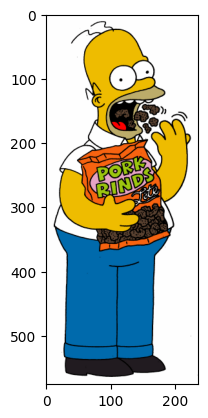

In [49]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image
from PIL import Image # Use PIL.Image instead
import matplotlib.pyplot as plt # Import matplotlib for displaying

test_image = image.load_img('/content/drive/MyDrive/dataset/test/homer/homer1.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

img = Image.open('/content/drive/MyDrive/dataset/test/homer/homer1.bmp')
plt.imshow(img)
plt.show()

In [50]:
# Previsão da primeira imagem
prediction

'Homer'

1/1 [==============================] - 0s 36ms/step


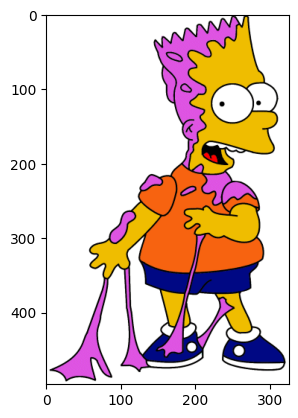

In [51]:
# Segunda Imagem
test_image = image.load_img('/content/drive/MyDrive/dataset/test/bart/bart1.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

img = Image.open('/content/drive/MyDrive/dataset/test/bart/bart1.bmp')
plt.imshow(img)
plt.show()

In [52]:
# Previsão da segunda imagem
prediction

'Bart'